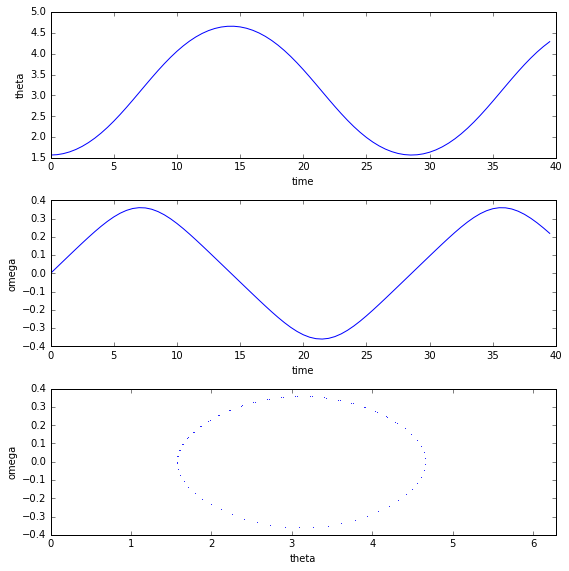

In [2]:
# %load scipy_ODE_solution.py
"""
Created on Fri Jun 30 20:49:39 2017

@author/model for code: Original as pNYU 
Physics as 
shown at http://www.physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html
"""

%matplotlib inline

import numpy as np
from math import pi
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#For the purposes of animation:
import matplotlib.animation as animation
from IPython.display import HTML

def f(y, t, params):
    theta, omega = y      # unpack current values of y
    I, D, M = params  # unpack parameters
    derivs = [omega,      # list of dy/dt=f functions
             -D*omega**2/I + M*np.sin(theta)/I]
    return derivs

# Parameters
h = 64 #height in inches
w = 150 #weight in lb
l=h*2.54/100   # "length" of person in water, m, from height h
r=l/2   # half the height of the person
t=0.2   # cross sectional thickness of person, m
A=l*t     # drag area of person
Cd = 1.0 # drag coefficient of person
m=w/2.2   # mass (kg)
rho = 1.225 #density of water, kg/m^3
mm = 1.0 # magnetic coefficient m
B = 1.0 # magnetic field strength


# Equation coefficients
I = (1.0/12.0)*m*(l**2)      # Moment of inertia
D = (r**3)*rho*A*Cd      # Viscous/fluid damping factor
M = mm*B     # Magnetic force factor.

# Initial values
theta0 = pi/2     # initial angular displacement
omega0 = 0.0     # initial angular velocity

# Bundle parameters for ODE solver
params = [I, D, M]

# Bundle initial conditions for ODE solver
y0 = [theta0, omega0]

# Make time array for solution
tStop = 40.
tInc = 0.5
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

#Translate angle into distances (x and y parameters)
x1=l*np.cos(psoln[:,0])
x2=-x1
y1=l*np.sin(psoln[:,0])
y2=-y1

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('theta')

# Plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('omega')

# Plot omega vs theta
ax3 = fig.add_subplot(313)
twopi = 2.0*np.pi
ax3.plot(psoln[:,0]%twopi, psoln[:,1], '.', ms=1)
ax3.set_xlabel('theta')
ax3.set_ylabel('omega')
ax3.set_xlim(0., twopi)

plt.tight_layout()
plt.show()





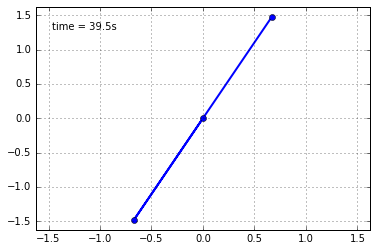

In [3]:
#Animation components bothered from "Double_Pendulum.py"
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-l*2, l*2), ylim=(-l*2, l*2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template%(i*tInc))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(psoln)),
    interval=200, blit=True, init_func=init)

HTML(ani.to_html5_video())